In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
plt.style.use('ggplot')
%matplotlib inline

In [2]:
ds = xr.open_dataset('tos_Omon_ACCESS1-3_historical_r1i1p1_185001-200512.nc')
print(ds)

<xarray.Dataset>
Dimensions:       (bnds: 2, i: 360, j: 300, time: 1872, vertices: 4)
Coordinates:
  * time          (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * j             (j) int32 0 1 2 3 4 5 6 7 ... 292 293 294 295 296 297 298 299
  * i             (i) int32 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
    lat           (j, i) float32 ...
    lon           (j, i) float32 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds     (time, bnds) datetime64[ns] ...
    lat_vertices  (j, i, vertices) float32 ...
    lon_vertices  (j, i, vertices) float32 ...
    tos           (time, j, i) float32 ...
Attributes:
    institution:            CSIRO (Commonwealth Scientific and Industrial Res...
    institute_id:           CSIRO-BOM
    experiment_id:          historical
    source:                 ACCESS1-3 2011. Atmosphere: AGCM v1.0 (N96 grid-p...
    model_id:               ACCESS1.3
    forcing:                GHG, Oz, SA, Sl,

In [3]:
tos = ds['tos'].sel(time=slice('1961-01', None))
print(tos)

<xarray.DataArray 'tos' (time: 540, j: 300, i: 360)>
[58320000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1961-01-16T12:00:00 ... 2005-12-16T12:00:00
  * j        (j) int32 0 1 2 3 4 5 6 7 8 ... 291 292 293 294 295 296 297 298 299
  * i        (i) int32 0 1 2 3 4 5 6 7 8 ... 351 352 353 354 355 356 357 358 359
    lat      (j, i) float32 ...
    lon      (j, i) float32 ...
Attributes:
    standard_name:     sea_surface_temperature
    long_name:         Sea Surface Temperature
    comment:           "this may differ from ""surface temperature"" in regio...
    units:             K
    cell_methods:      time: mean
    cell_measures:     area: areacello
    history:           2012-02-06T01:20:16Z altered by CMOR: replaced missing...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...


In [4]:
tos = tos - 273.15

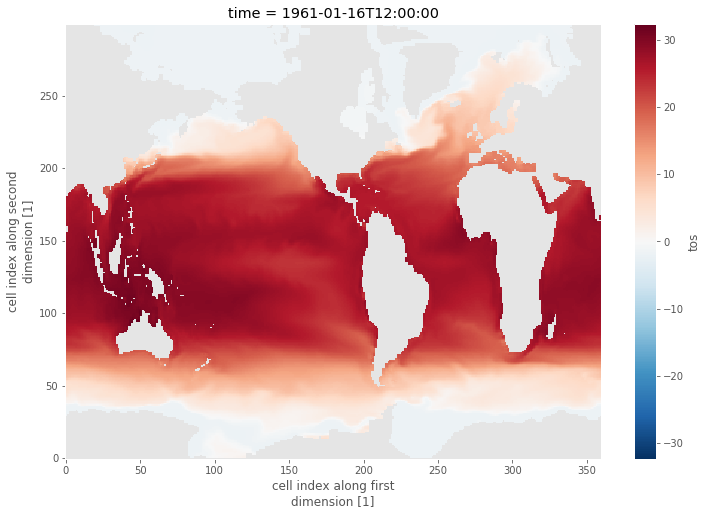

In [7]:
plot1 = tos.isel(time=0).plot(size=8);
plt.savefig('gambar22.png')

In [13]:
tos_nino34 = tos.where((tos['lat']<5) & (tos['lat'] > -5) & (tos['lon'] > 190) & (tos['lon'] < 240),drop=True)
print(tos_nino34)

<xarray.DataArray 'tos' (time: 540, j: 30, i: 50)>
array([[[28.205902, 28.077667, 27.951202, ..., 24.75177 , 24.604523,
         24.379639],
        [27.9234  , 27.809052, 27.714508, ..., 24.43805 , 24.30252 ,
         24.150177],
        [27.67038 , 27.586761, 27.519623, ..., 24.212036, 24.117676,
         24.029785],
        ...,
        [27.347443, 27.319305, 27.243011, ..., 26.490051, 26.680817,
         26.876953],
        [27.411865, 27.381226, 27.314392, ..., 27.118835, 27.048767,
         27.073029],
        [27.51065 , 27.473969, 27.43573 , ..., 27.686188, 27.612732,
         27.519012]],

       [[27.671814, 27.688416, 27.74231 , ..., 25.570496, 25.589874,
         25.619598],
        [27.52945 , 27.578827, 27.641266, ..., 25.59787 , 25.637878,
         25.671722],
        [27.410645, 27.463379, 27.519714, ..., 25.645813, 25.690826,
         25.723236],
        ...,
        [26.956543, 26.786163, 26.581757, ..., 27.481384, 27.492828,
         27.445496],
        [27.123901, 2

In [18]:
baseline = tos_nino34.sel(time=slice('1961', '1990'))
rata2baseline = baseline.groupby('time.month').mean(dim='time')
print(rata2baseline)

<xarray.DataArray 'tos' (month: 12, j: 30, i: 50)>
array([[[28.734009, 28.683922, 28.62647 , ..., 25.633846, 25.560766,
         25.505913],
        [28.576729, 28.524076, 28.46182 , ..., 25.484318, 25.437967,
         25.407549],
        [28.425814, 28.37262 , 28.308289, ..., 25.385897, 25.361462,
         25.346092],
        ...,
        [27.48979 , 27.473026, 27.45908 , ..., 28.11144 , 28.147196,
         28.171959],
        [27.553219, 27.53573 , 27.525557, ..., 28.252934, 28.28584 ,
         28.314861],
        [27.665508, 27.641302, 27.62802 , ..., 28.303043, 28.337564,
         28.367184]],

       [[28.49192 , 28.448612, 28.40968 , ..., 26.495714, 26.490767,
         26.487186],
        [28.267859, 28.223877, 28.175428, ..., 26.463076, 26.469034,
         26.475443],
        [28.053047, 28.006193, 27.952213, ..., 26.435997, 26.451412,
         26.463696],
        ...,
        [27.270794, 27.236818, 27.2098  , ..., 28.014517, 28.044697,
         28.03987 ],
        [27.30439 , 2

In [28]:
anomali = tos_nino34.groupby('time.month') - rata2baseline 
print(anomali)

<xarray.DataArray 'tos' (time: 540, j: 30, i: 50)>
array([[[-5.28106689e-01, -6.06254578e-01, -6.75268173e-01, ...,
         -8.82076263e-01, -9.56243515e-01, -1.12627411e+00],
        [-6.53327942e-01, -7.15024948e-01, -7.47312546e-01, ...,
         -1.04626846e+00, -1.13544655e+00, -1.25737190e+00],
        [-7.55434036e-01, -7.85858154e-01, -7.88665771e-01, ...,
         -1.17386055e+00, -1.24378586e+00, -1.31630707e+00],
        ...,
        [-1.42347336e-01, -1.53720856e-01, -2.16068268e-01, ...,
         -1.62138939e+00, -1.46637917e+00, -1.29500580e+00],
        [-1.41353607e-01, -1.54504776e-01, -2.11164474e-01, ...,
         -1.13409805e+00, -1.23707199e+00, -1.24183273e+00],
        [-1.54857635e-01, -1.67333603e-01, -1.92289352e-01, ...,
         -6.16855621e-01, -7.24832535e-01, -8.48171234e-01]],

       [[-8.20106506e-01, -7.60196686e-01, -6.67369843e-01, ...,
         -9.25218582e-01, -9.00892258e-01, -8.67588043e-01],
        [-7.38409042e-01, -6.45050049e-01, -5.341625

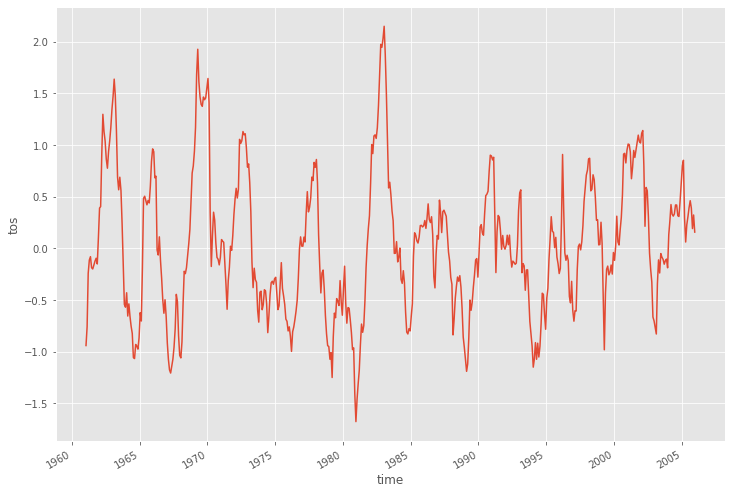

In [33]:
indeks_nino34 = anomali.mean(dim=('i', 'j'))
indeks_nino34.plot(size=8);

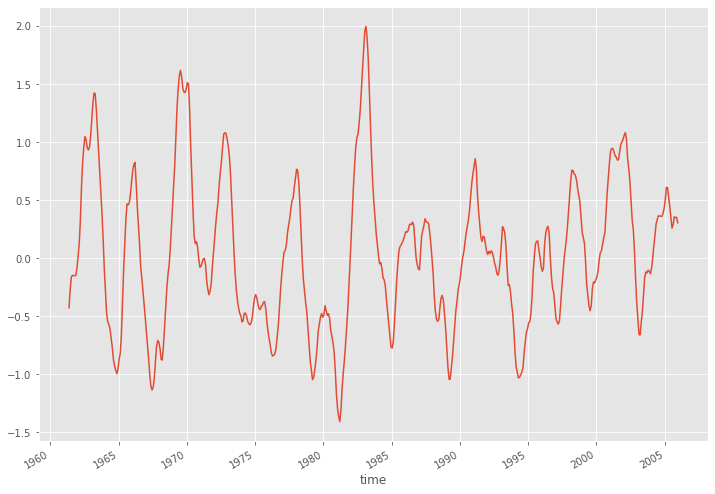

In [37]:
indeks_nino34.rolling(time=5).mean().plot(size=8);

In [38]:
tos_nino34

<xarray.DataArray 'tos' (time: 540, j: 30, i: 50)>
array([[[28.205902, 28.077667, 27.951202, ..., 24.75177 , 24.604523,
         24.379639],
        [27.9234  , 27.809052, 27.714508, ..., 24.43805 , 24.30252 ,
         24.150177],
        [27.67038 , 27.586761, 27.519623, ..., 24.212036, 24.117676,
         24.029785],
        ...,
        [27.347443, 27.319305, 27.243011, ..., 26.490051, 26.680817,
         26.876953],
        [27.411865, 27.381226, 27.314392, ..., 27.118835, 27.048767,
         27.073029],
        [27.51065 , 27.473969, 27.43573 , ..., 27.686188, 27.612732,
         27.519012]],

       [[27.671814, 27.688416, 27.74231 , ..., 25.570496, 25.589874,
         25.619598],
        [27.52945 , 27.578827, 27.641266, ..., 25.59787 , 25.637878,
         25.671722],
        [27.410645, 27.463379, 27.519714, ..., 25.645813, 25.690826,
         25.723236],
        ...,
        [26.956543, 26.786163, 26.581757, ..., 27.481384, 27.492828,
         27.445496],
        [27.123901, 27.010681, 26.823761, ..., 27.6008  , 27.61148 ,
         27.572113],
        [27.245148, 27.203278, 27.088898, ..., 27.661835, 27.675293,
         27.647522]],

       [[27.445587, 27.109985, 26.818237, ..., 26.897858, 26.876404,
         26.858765],
        [27.096619, 26.74881 , 26.471527, ..., 26.960663, 26.944153,
         26.930328],
        [26.825592, 26.529816, 26.340668, ..., 27.009613, 26.998718,
         26.989563],
        ...,
        [27.122559, 27.156342, 27.144073, ..., 27.460388, 27.368408,
         27.256561],
        [27.186646, 27.235046, 27.24759 , ..., 27.468933, 27.383331,
         27.281647],
        [27.28122 , 27.308228, 27.325012, ..., 27.472656, 27.390625,
         27.299347]],

       ...,

       [[29.720764, 29.717865, 29.71579 , ..., 25.338654, 25.194519,
         25.066559],
        [29.583344, 29.582214, 29.57196 , ..., 25.222412, 25.098694,
         24.978455],
        [29.426453, 29.421875, 29.404205, ..., 25.137573, 25.009705,
         24.891693],
        ...,
        [29.245605, 29.22821 , 29.236267, ..., 28.039062, 27.8508  ,
         27.679413],
        [29.559937, 29.519623, 29.509827, ..., 28.381256, 28.241943,
         28.102142],
        [29.867462, 29.82721 , 29.803192, ..., 28.645355, 28.557281,
         28.457214]],

       [[29.643158, 29.662842, 29.672394, ..., 25.450317, 25.397095,
         25.281067],
        [29.526093, 29.525574, 29.481262, ..., 25.25055 , 25.215363,
         25.117035],
        [29.362488, 29.3031  , 29.19632 , ..., 25.073395, 25.057251,
         24.972595],
        ...,
        [29.277496, 29.254974, 29.219849, ..., 28.198975, 28.135284,
         28.1492  ],
        [29.488312, 29.460846, 29.427032, ..., 28.522186, 28.477234,
         28.487823],
        [29.67221 , 29.658936, 29.640228, ..., 28.747833, 28.7247  ,
         28.733246]],

       [[29.43628 , 29.400604, 29.324066, ..., 25.582611, 25.461945,
         25.3667  ],
        [29.188446, 29.11142 , 29.024078, ..., 25.397247, 25.288483,
         25.210907],
        [28.913757, 28.819336, 28.725677, ..., 25.251007, 25.163116,
         25.101929],
        ...,
        [28.63678 , 28.599548, 28.54776 , ..., 28.473145, 28.459747,
         28.354675],
        [28.836548, 28.832336, 28.823853, ..., 28.73877 , 28.749268,
         28.692078],
        [28.956085, 28.962463, 28.978882, ..., 28.893646, 28.90738 ,
         28.882751]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1961-01-16T12:00:00 ... 2005-12-16T12:00:00
  * j        (j) int32 122 123 124 125 126 127 128 ... 146 147 148 149 150 151
  * i        (i) int32 110 111 112 113 114 115 116 ... 154 155 156 157 158 159
    lat      (j, i) float32 -4.8328757 -4.8328757 ... 4.8328757 4.8328757
    lon      (j, i) float32 190.5 191.5 192.5 193.5 ... 236.5 237.5 238.5 239.5

In [61]:
std = tos_nino34.groupby('time.month').std(dim=('i','j'))
print(std)

<xarray.DataArray 'tos' (time: 540)>
array([1.2422389 , 0.9805925 , 0.9578793 , 1.107628  , 1.060475  ,
       0.87603796, 0.8034382 , 0.90900564, 1.0612172 , 1.2560341 ,
       1.2360592 , 1.14738   , 0.993962  , 0.91997117, 0.7473066 ,
       0.73240346, 0.9013341 , 0.82382977, 0.83531374, 1.0416828 ,
       1.0773352 , 1.0681301 , 1.112065  , 0.98886997, 0.7488438 ,
       0.5209376 , 1.0453959 , 1.4461775 , 1.5847889 , 1.1505953 ,
       0.9475133 , 0.95008314, 1.2932465 , 1.557206  , 1.5676731 ,
       1.4170887 , 1.1187215 , 1.037376  , 1.1227362 , 1.3979199 ,
       1.3277106 , 1.0779637 , 1.0496899 , 1.1024587 , 1.0688545 ,
       1.1601774 , 1.3062171 , 1.2613887 , 1.188604  , 1.092287  ,
       0.8912678 , 0.76508576, 0.83071226, 0.7682777 , 0.7369385 ,
       0.8203037 , 1.0313491 , 1.1645744 , 1.0742376 , 1.0262287 ,
       0.896034  , 0.8569476 , 0.9862449 , 1.7093011 , 1.4886559 ,
       1.1814933 , 1.2070396 , 1.2005563 , 1.3638688 , 1.5509337 ,
       1.4601024 , 1.2153

/home/ronggolawe/anaconda3/envs/tutorial_xarray/lib/python3.7/site-packages/xarray/core/common.py:664: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  self, group, squeeze=squeeze, restore_coord_dims=restore_coord_dims


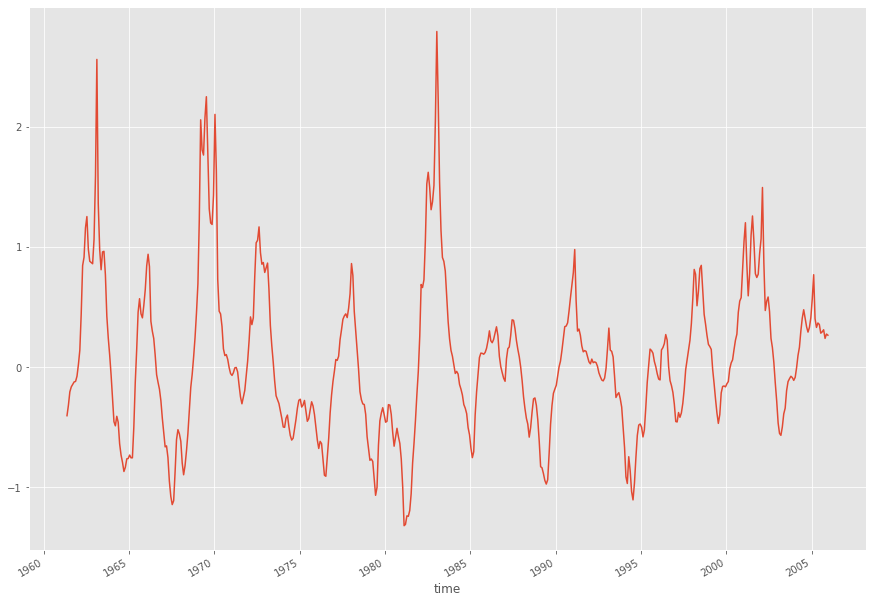

In [63]:
(indeks_nino34.rolling(time=5).mean()/ std).plot(size=10);
plt.savefig('gambar24.png')